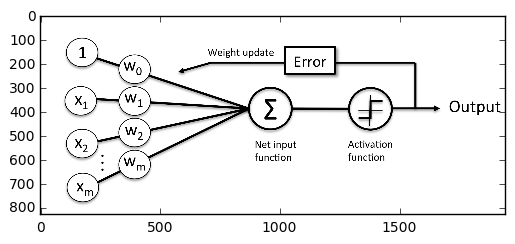

In [20]:
from PIL import Image


#this command is to connect to a GUI event loop
%matplotlib inline

import matplotlib.image as mpimage
import matplotlib.pyplot as plt

# mpimage.imread() returns an array, already converted uint8 -> float32
# imagePLT = mpimage.imread('./percepton.png')
# print imagePLT.dtype
# plt.imshow(imagePLT)
# plt.imshow(imagePLT[:,:,0])
# plt.hist((imagePLT[:,:,0]).ravel(), bins=30, range=(0.3, 1.0), fc='k', ec='k')

image = Image.open('./percepton.png')
plt.imshow(image)

In [143]:
import numpy as np

class percepton:
    # w is weights 
    # x is input
    
    def __init__(self, num_iter=10, init_lr=0.01):
        self.iternum = num_iter
        self.lr = init_lr
        
    def fit(self, x, y):
        self.w = np.zeros([1, x.shape[1]+1])
        self.errors = []
        X = np.hstack((np.zeros([x.shape[0], 1]), x))
        
        for i in range(self.iternum):
            error = 0.0
            for xi, target in zip(X, y):
                #update = lr * delta(w)->gradient
                update_w = self.lr*(target - self.predict(xi))
                self.w += xi * update_w
                error += int(update_w != 0.0)
#             print error
            self.errors.append(error)
            
        return self
    
    def predict(self, x):
        return np.where(np.dot(self.w, x)>=0.0, 1, -1)


In [144]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


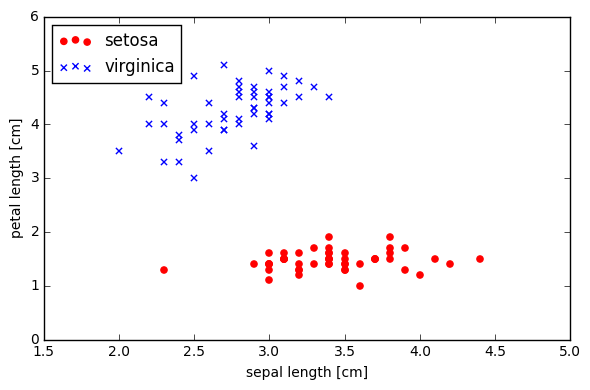

In [145]:
y = np.where(df.iloc[0:100, 4]=='Iris-setosa', 1, -1)
X = df.iloc[0:100, [1, 2]].values

plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[51:, 0], X[51:, 1], color='blue', marker='x', label='virginica')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

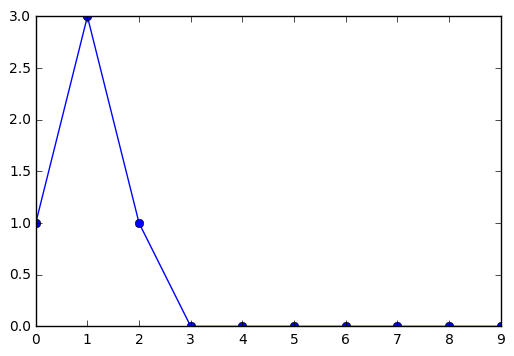

In [146]:
ppn = percepton()
ppn.fit(X, y)
plt.plot(range(10), ppn.errors, marker='o')
plt.show()

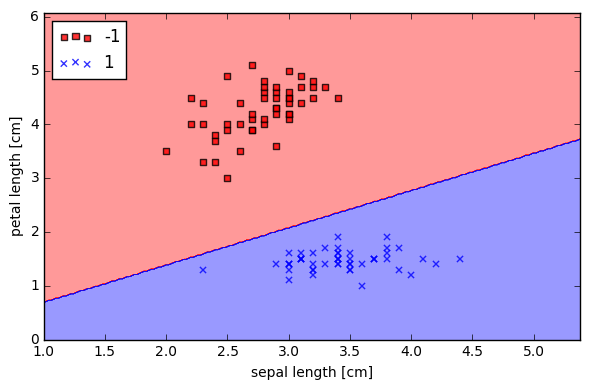

In [161]:
#plot decision region
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([np.zeros(xx1.ravel().shape), xx1.ravel(), xx2.ravel()]))
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./perceptron_2.png', dpi=300)
plt.show()


In [198]:
## minimize cost function with AdaSGD updates

# linear activation, vs. sigmoid activation (logistic function)

class percepton_sgd:
    def __init__(self, lr=0.01, iter_num=100):
        self.lr = lr
        self.iter_num = iter_num
    
    def fit(self, x, y):
        self.w = np.zeros([x.shape[1]+1, 1])
        X = np.hstack((np.zeros([x.shape[0], 1]), x))
        
        self.costs = []       
        for i in range(self.iter_num):
            cost = 0.0
            output = self.net_input(x)
            self.w += self.lr * np.dot(X.T, target - output)
            cost = (((target-output)**2).sum()/2.0)
            self.costs.append(cost/len(y))
        return self
    
    def net_input(self, x):
        return x.dot(self.w[1:]) + self.w[0]
        
    def activation(self, x):
#         return 1/1+exp(-self.net_input(x)) 
        return self.net_input(x)
    
    #quantizer function
    def predict(self, x):
        return np.where(self.activation(x)>0, 1, -1)
        

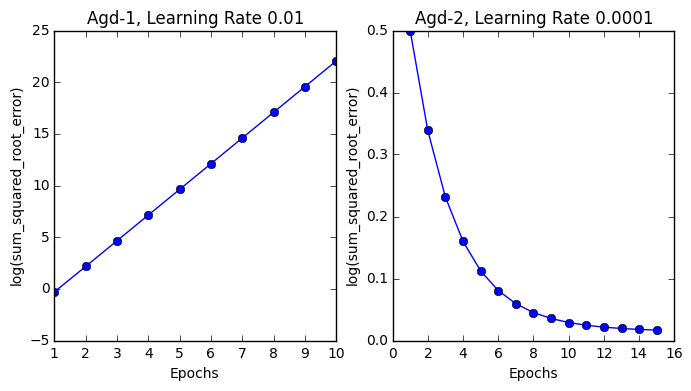

In [199]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))
agd1 = percepton_sgd(iter_num=10, lr=0.01).fit(X,y)
ax[0].plot(range(1, 11), np.log10(agd1.costs), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(sum_squared_root_error)')
ax[0].set_title('Agd-1, Learning Rate 0.01')

adg2 = percepton_sgd(iter_num=15, lr=0.0001).fit(X,y)
ax[1].plot(range(1, 16), adg2.costs, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(sum_squared_root_error)')
ax[1].set_title('Agd-2, Learning Rate 0.0001')

In [200]:
##with shuffle and random fitting a sample of training data

## difference between GD and SGD is that SGD using every sample to update the weights, 
## while GD takes the whole x as a matrix

from numpy.random import seed

class AdalinearSGD:
    def __init__(self, num_iter = 15, lr = 0.01, shuffle = True, random_state=None):
        self.num_iter = num_iter
        self.lr = lr
        self.shuffle = shuffle
        self.random_state = random_state
        
    def _shuffle(self, x, y):
        r = np.random.permutation(len(y))
        return x[r], y[r]
    
    def _initialize_weight(self, m):
        self.w = np.zeros(1+m)
        self.w_initialized = True
        
    def net_input(self, x):
        return np.dot(x, self.w[1:])+self.w[0]

    def activation(self, x):
        """Compute linear activation"""
        return self.net_input(x)

    def predict(self, x):
        """Return class label after unit step"""
        return np.where(self.activation(x) >= 0.0, 1, -1)

        
    def update_weights(self, xi, target):
        output = self.net_input(xi)
        error = (target - output)
        self.w[1:] += self.lr * xi.dot(error)
        self.w[0] += self.lr * error
        cost = 0.5 * error**2
        return cost
        
    def fit(self, x, y):
        self._initialize_weight(x.shape[1])
        self.costs = []
        
        for i in range(self.num_iter):
            if self.shuffle:
                self._shuffle(x, y)
            cost = []
            for xi, target in zip(x, y):
                cost.append(self.update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.costs.append(avg_cost)
        return 
    
    def partial_fit(self, x, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(x.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(x, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(x, y)
        return  

0.0238154208682 0.0167514775795


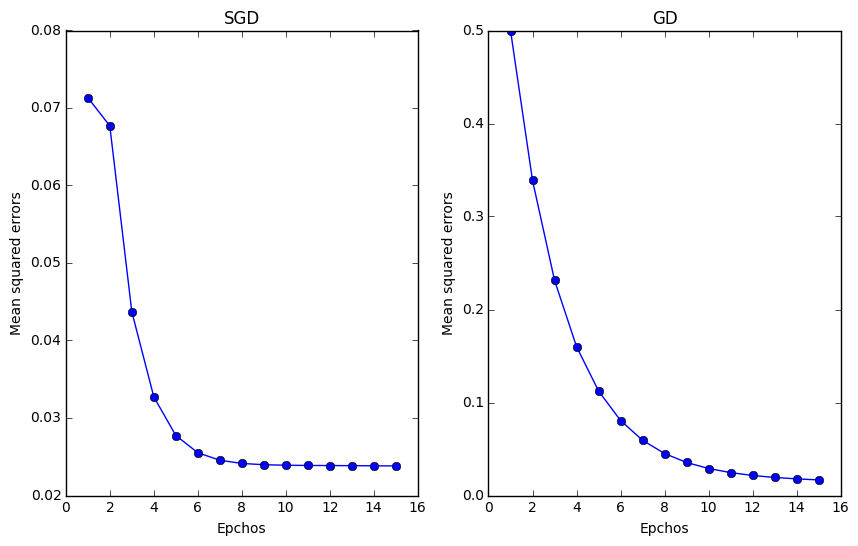

In [202]:
asdgNN = AdalinearSGD()
X_std = np.copy(X)
X_std[:, 0] = X[:, 0] - X[:,0].mean()/X[:,0].std()
X_std[:, 1] = X[:, 1] - X[:,1].mean()/X[:,1].std()
asdgNN.fit(X, y)

agd1 = percepton_sgd(iter_num=15, lr=0.0001).fit(X,y)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
ax[0].plot(range(1, 16), asdgNN.costs, marker='o')
ax[0].set_xlabel('Epchos')
ax[0].set_ylabel('Mean squared errors')
ax[0].set_title('SGD')

ax[1].plot(range(1, 16), agd1.costs, marker='o')
ax[1].set_xlabel('Epchos')
ax[1].set_ylabel('Mean squared errors')
ax[1].set_title('GD')

print min(asdgNN.costs), min(agd1.costs)